Task 3

Mukul Chaudhari

# Music Recommendation

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as msn
import pandas as pd
import os
os.system('apt-get install p7zip')
!pip install pyunpack
!pip install patool
from pyunpack.cli import Archive
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.model_selection import RandomizedSearchCV
import xgboost
import lightgbm as lgb
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Input, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import roc_auc_score

In [2]:
members=pd.read_csv('members.csv')
sample_submission=pd.read_csv('sample_submission.csv')
songs_extra_info=pd.read_csv('song_extra_info.csv')
songs=pd.read_csv('songs.csv')
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

In [3]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


<AxesSubplot:xlabel='bd'>

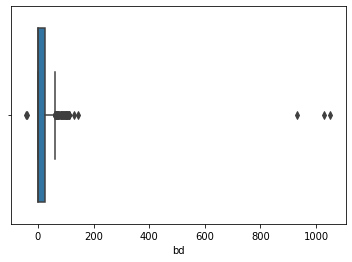

In [4]:
sns.boxplot(x=members['bd'])

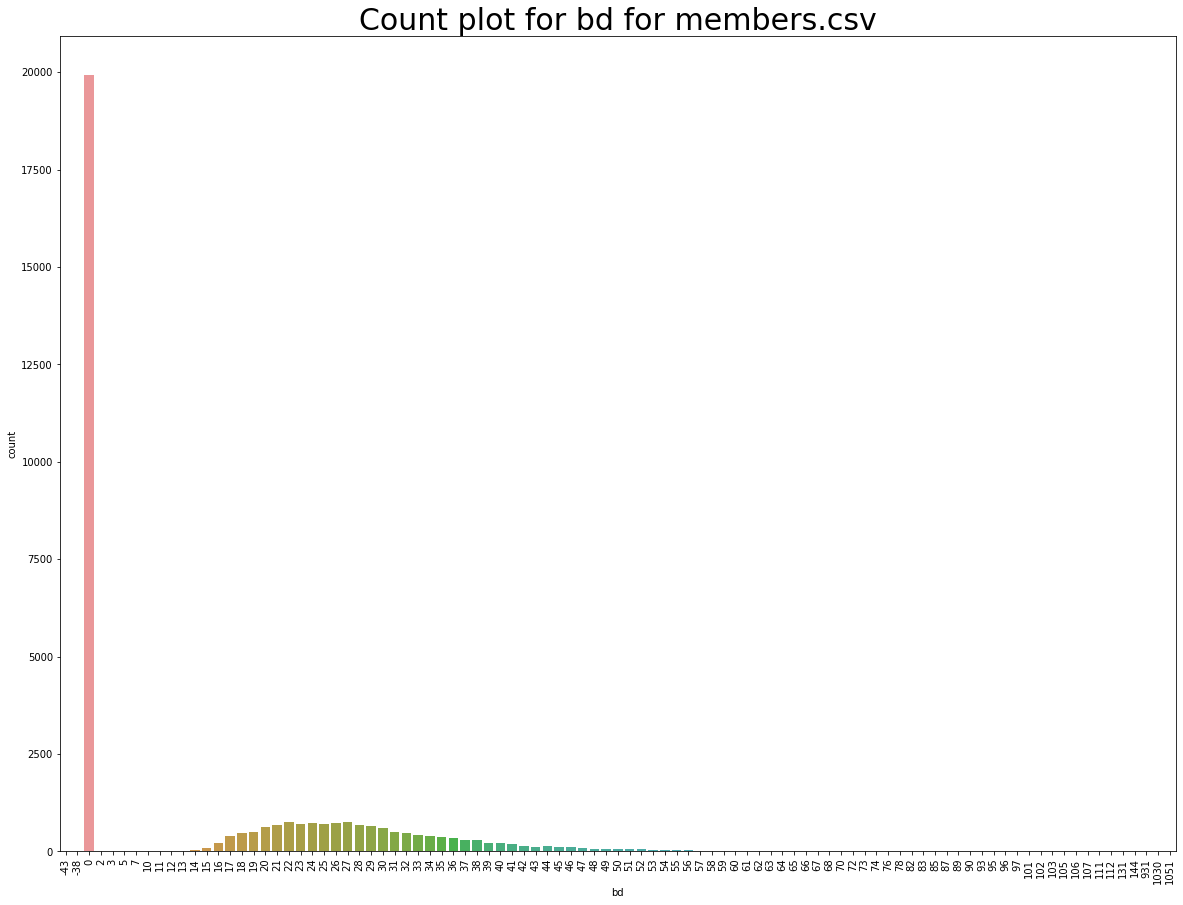

In [5]:
plt.figure(figsize=(20,15)) 
sns.countplot(x ='bd', data = members) 
plt.xticks(rotation='90')
plt.title('Count plot for bd for members.csv',fontsize=30)
plt.show() 

In [6]:
members["bd"].describe()

count    34403.000000
mean        12.280935
std         18.170251
min        -43.000000
25%          0.000000
50%          0.000000
75%         25.000000
max       1051.000000
Name: bd, dtype: float64

In [7]:
count=0
for i in members["bd"]:
    if i<=50 and i>=10:
        count+=1
percentage=(count/len(members["bd"]))*100
percentage=("{:.2f}".format(percentage))
print(percentage,"% of user is between 10 and 50")

40.74 % of user is between 10 and 50


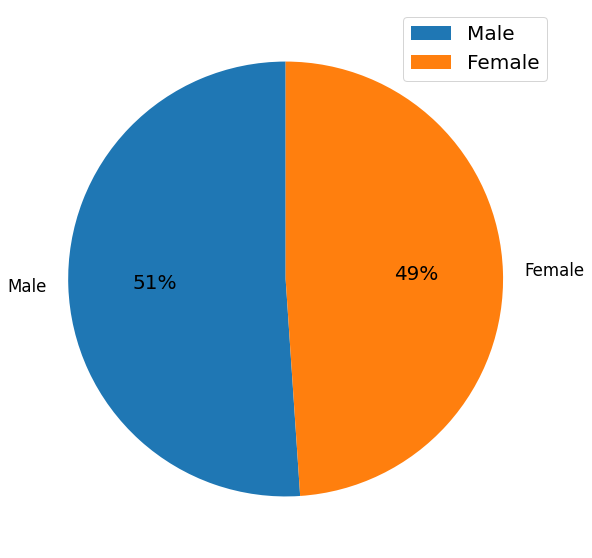

In [8]:

mpl.rcParams['font.size'] = 20.0
labels = ['Male','Female']
plt.figure(figsize = (10, 10))
sizes = pd.value_counts(members.gender)
patches, texts, autotexts = plt.pie(sizes, 
                                    labels=labels, autopct='%.0f%%',
                                    shadow=False, radius=1,startangle=90)
for t in texts:
    t.set_size('smaller')
    plt.legend()
plt.show()

In [9]:
count = members["gender"].isna().sum()
percentage=(count/len(members['gender']))*100
percentage = "{:.3f}".format(percentage)
print("Total count of gender column of members                   :  ",len(members['gender']))
print("Number of NaN value in gender column of members           :  ",count)
print("Number of non-NaN value in gender coumn of members        :  ",(len(members['gender'])-count))
print("Total percentage of NaN value in gender column of members :  ",percentage+" %")
print("-----------------------------------------------------------------------")

Total count of gender column of members                   :   34403
Number of NaN value in gender column of members           :   19902
Number of non-NaN value in gender coumn of members        :   14501
Total percentage of NaN value in gender column of members :   57.850 %
-----------------------------------------------------------------------


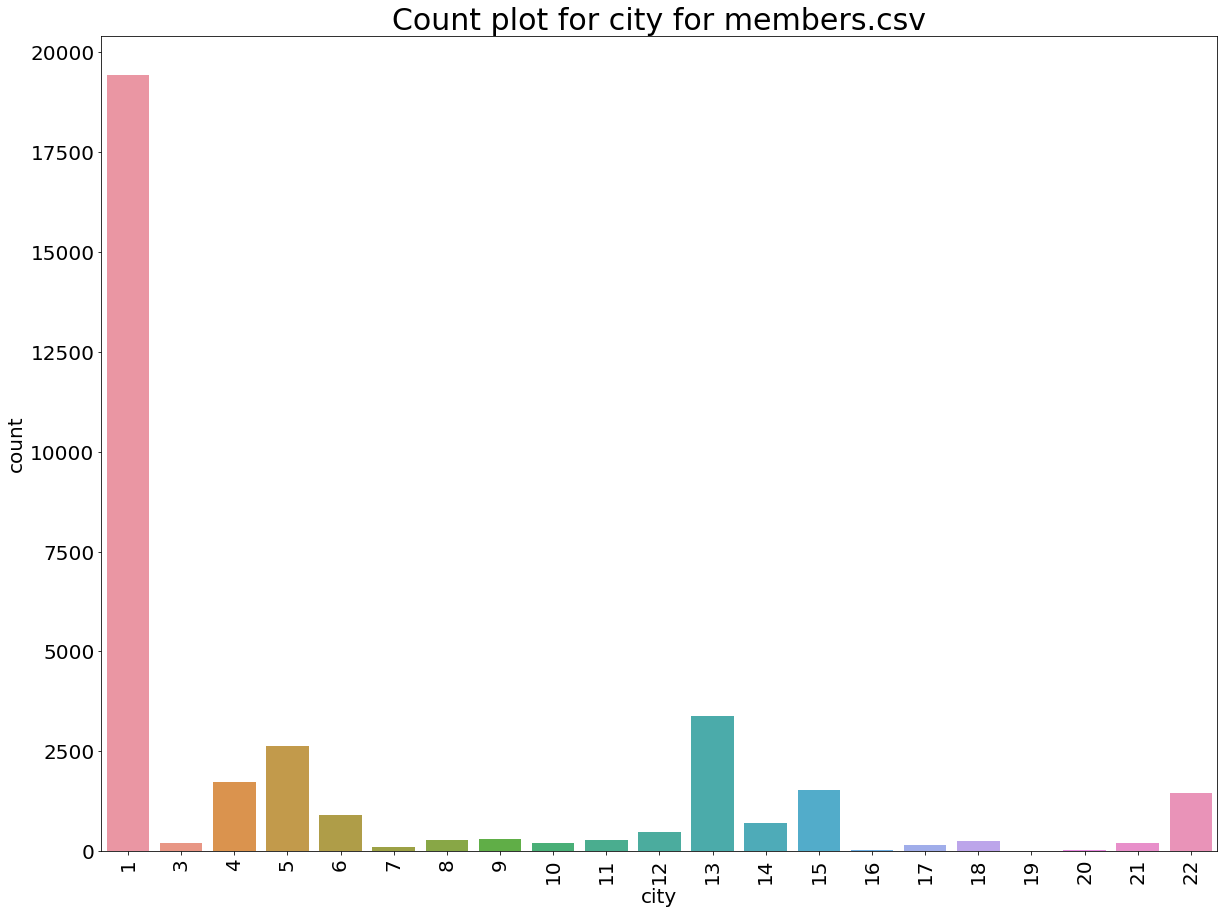

In [10]:
plt.figure(figsize=(20,15))
sns.countplot(x ='city', data = members) 
plt.xticks(rotation='90')
plt.title('Count plot for city for members.csv',fontsize=30)
plt.show() 

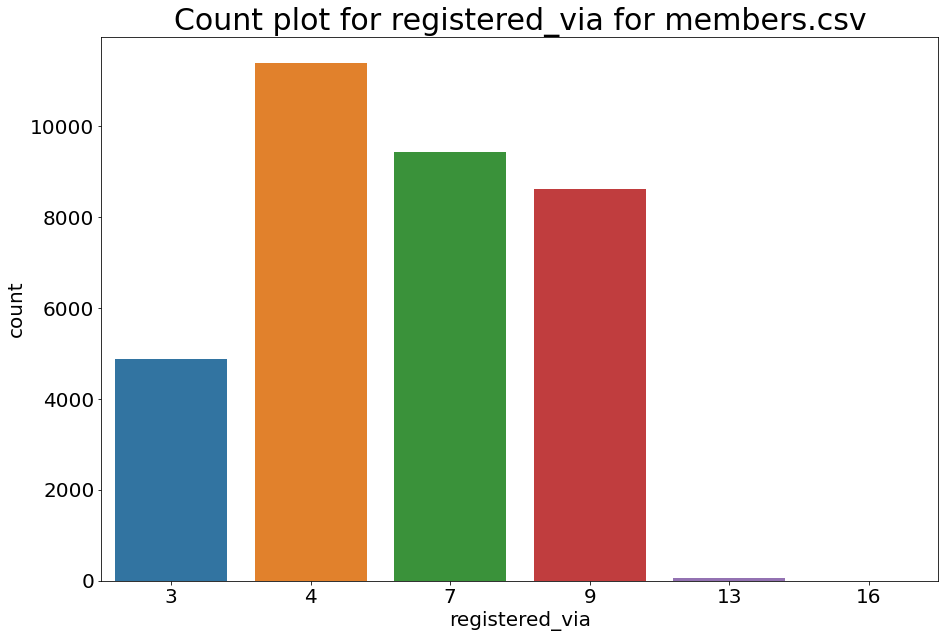

In [11]:
plt.figure(figsize=(15,10))
sns.countplot(x ='registered_via', data = members) 
plt.title('Count plot for registered_via for members.csv',fontsize=30)
plt.show() 

In [12]:
members["registration_init_time"].head()

0    20110820
1    20150628
2    20160411
3    20150906
4    20170126
Name: registration_init_time, dtype: int64

In [13]:
members["expiration_date"].head()

0    20170920
1    20170622
2    20170712
3    20150907
4    20170613
Name: expiration_date, dtype: int64

In [14]:
import datetime
members["expiration_date"]= pd.to_datetime(members["expiration_date"],format='%Y%m%d') 
members["registration_init_time"]= pd.to_datetime(members["registration_init_time"],format='%Y%m%d') 
members.dtypes

msno                              object
city                               int64
bd                                 int64
gender                            object
registered_via                     int64
registration_init_time    datetime64[ns]
expiration_date           datetime64[ns]
dtype: object

In [15]:
members["registration_init_time"].head()
members["expiration_date"].head()

0   2017-09-20
1   2017-06-22
2   2017-07-12
3   2015-09-07
4   2017-06-13
Name: expiration_date, dtype: datetime64[ns]

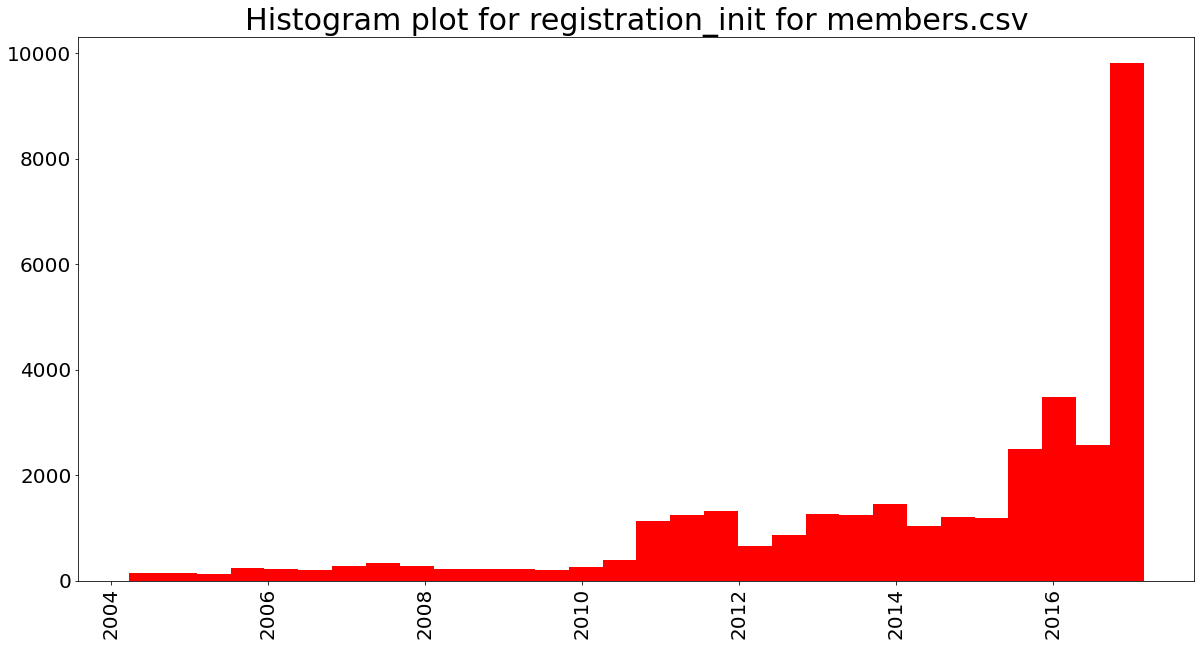

In [16]:
plt.figure(figsize=(20,10))
plt.hist(members["registration_init_time"],bins=30,color='red')
plt.xticks(rotation='90')
plt.title('Histogram plot for registration_init for members.csv',fontsize=30)
plt.show()

In [17]:
songs_extra_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [18]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [19]:
from tqdm import tqdm
lst=[]
for i in tqdm(songs["song_length"]):
    minutes = ((i/(1000*60))%60)
    minutes = round(minutes)
    lst.append(minutes)

100%|████████████████████████████████████████████████████████████████████| 2296320/2296320 [00:02<00:00, 851342.05it/s]


In [20]:
songs["song_duration_minutes"]=lst

In [21]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,song_duration_minutes
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,4
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0,3
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0,4
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0,5
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0,2


c:\users\nita\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'PDF for song_duration_minutes')

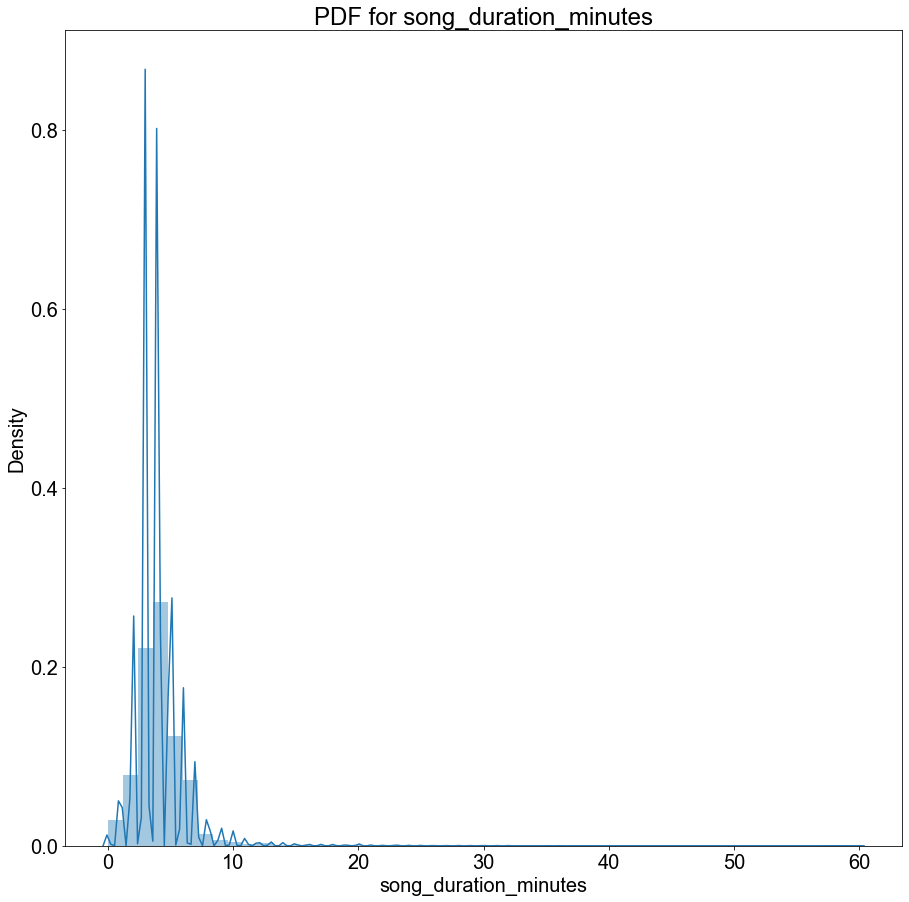

In [22]:
plt.figure(figsize = (15, 15)) 
sns.distplot(songs.song_duration_minutes)
sns.set(font_scale=2)
plt.title('PDF for song_duration_minutes')

In [23]:
count1=0
for i in songs["song_duration_minutes"]:
    if i<=10 and i>0:
        count1+=1
percentage1=(count1/len(songs["song_duration_minutes"]))*100
percentage1=round(percentage1)
print(percentage1,"% of song length is between 1 and 10")

98 % of song length is between 1 and 10


In [24]:
"""plt.figure(figsize = (15, 15)) 
sns.distplot(songs.genre_ids)
sns.set(font_scale=2)
plt.title('PDF for genre id')"""
count=0
for i in songs["genre_ids"]:
    if i=='864|857|850|843':
        count+=1
print("Total count for '864|857|850|843' in genre_ids column : ",count)

Total count for '864|857|850|843' in genre_ids column :  6842


In [25]:
lst1=[]
for i in songs["genre_ids"]:
  if i != '864|857|850|843':
    lst1.append(i)
print(lst1[:10])

['465', '444', '465', '465', '726', '458', '465', '465', '352|1995', '2157']


In [26]:
songs["genre_ids"]=songs["genre_ids"].astype(str)
import re
word = 'asdf*'
special_char=0
regexp = re.compile('[^0-9a-zA-Z]+')
for i in songs["genre_ids"]:
  if regexp.search(i):
    special_char+=1

print("Total count of values containing special character '|' in genre_ids column         : ",special_char)
print("Total percentage for values containing special character '|'  in genre_ids column  : ",(special_char/len(songs["genre_ids"]))*100,"%")

Total count of values containing special character '|' in genre_ids column         :  172876
Total percentage for values containing special character '|'  in genre_ids column  :  7.528393255295429 %


In [27]:
count1 = songs["genre_ids"].isnull().sum()
print("Total count of gender column of members                   :  ",len(songs["genre_ids"]))
print("Number of NaN value in gender column of members           :  ",count1)
print("Number of non-NaN value in gender coumn of members        :  ",(len(songs["genre_ids"])-count1))
print("-----------------------------------------------------------------------")

Total count of gender column of members                   :   2296320
Number of NaN value in gender column of members           :   0
Number of non-NaN value in gender coumn of members        :   2296320
-----------------------------------------------------------------------


In [28]:
song_info = songs_extra_info.merge(songs, on='song_id', how='left')

In [29]:
song_info.head()

,song_id,name,isrc,song_length,genre_ids,artist_name,composer,lyricist,language,song_duration_minutes
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043,307304.0,458,愛上巧克力 原聲帶,An-An Tso,NaN,3.0,5.0
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015,205914.0,1609,DJ Snake,Justin Bieber| William Grigahcine| Andrew Watt...,NaN,52.0,3.0
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303,252160.0,465,蕭敬騰 (Jam Hsiao),A Qin,A Qin| Chen Tian You| Wu Yi Wei,3.0,4.0
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446,175427.0,465,MKTO,Evan Bogart|Andrew Goldstein|Lindy Robbins|Ema...,Evan Bogart|Andrew Goldstein|Lindy Robbins|Ema...,52.0,3.0
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001,294983.0,458,羅志祥 (Show Lo),Drew Ryan Scott / David Moses Jassy / Niclas M...,Drew Ryan Scott / David Moses Jassy / Niclas M...,3.0,5.0


In [30]:
from collections import Counter  
d = Counter(song_info["genre_ids"]) 
df = pd.DataFrame.from_records(d.most_common(), columns=['genre_id','count'])
print(df.head(50))

           genre_id   count
0               465  567699
1               958  176290
2              2022  168805
3              1609  166399
4              2122  139873
5              1259  101440
6               nan   94073
7               921   67561
8              1152   48713
9               359   43584
10              786   42989
11              726   34955
12              139   34871
13             1011   33999
14              940   33474
15         1572|275   24323
16             1955   20970
17              691   19468
18      139|125|109   17601
19              873   17533
20              437   17202
21              947   17099
22              388   16770
23              458   15434
24              444   14853
25             1616   14186
26              242   13748
27              451   13281
28              880   13053
29              423   11804
30              829   11752
31             2130   11049
32             1138   10767
33             1180   10700
34        1616|2058 

In [31]:
df.describe()

,count
count,1047.000000
mean,2192.904489
std,21063.057511
min,1.000000
25%,3.000000
50%,13.000000
75%,101.500000
max,567699.000000


In [32]:
print("Total percentage for NaN value in song_id column        : ",(song_info["song_id"].isna().sum()/len(song_info["song_id"]))*100,"%")
print("Total percentage for NaN value in name column           : ",(song_info["name"].isna().sum()/len(song_info["name"]))*100,"%")
print("Total percentage for NaN value in isrc column           : ",(song_info["isrc"].isna().sum()/len(song_info["isrc"]))*100,"%")
print("Total percentage for NaN value in song_length column    : ",(song_info["song_length"].isna().sum()/len(song_info["song_length"]))*100,"%")
print("Total percentage for NaN value in genre_ids column      : ",(song_info["genre_ids"].isna().sum()/len(song_info["genre_ids"]))*100,"%")

print("Total percentage for NaN value in artist_name column    : ",(song_info["artist_name"].isna().sum()/len(song_info["artist_name"]))*100,"%")
print("Total percentage for NaN value in composer column       : ",(song_info["composer"].isna().sum()/len(song_info["composer"]))*100,"%")
print("Total percentage for NaN value in lyricist column       : ",(song_info["lyricist"].isna().sum()/len(song_info["lyricist"]))*100,"%")
print("Total percentage for NaN value in language column       : ",(song_info["language"].isna().sum()/len(song_info["language"]))*100,"%")

Total percentage for NaN value in song_id column        :  0.0 %
Total percentage for NaN value in name column           :  8.710911418306241e-05 %
Total percentage for NaN value in isrc column           :  5.9472876617344035 %
Total percentage for NaN value in song_length column    :  0.023911451843250633 %
Total percentage for NaN value in genre_ids column      :  0.023911451843250633 %
Total percentage for NaN value in artist_name column    :  0.023911451843250633 %
Total percentage for NaN value in composer column       :  46.6681417143335 %
Total percentage for NaN value in lyricist column       :  84.71674947113878 %
Total percentage for NaN value in language column       :  0.023955006400342163 %


<AxesSubplot:>

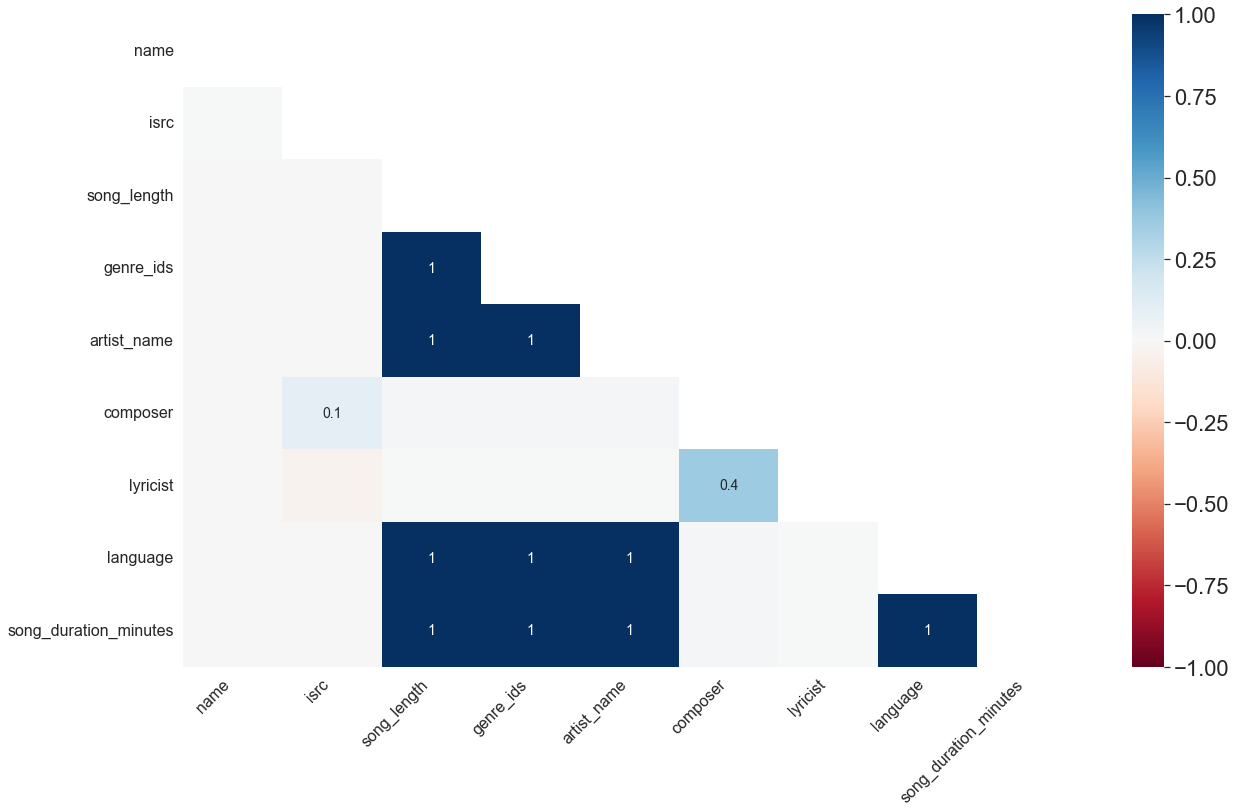

In [33]:
msn.heatmap(song_info)

# Train.csv

Text(0.5, 1.0, 'Count plot for system tab there are using')

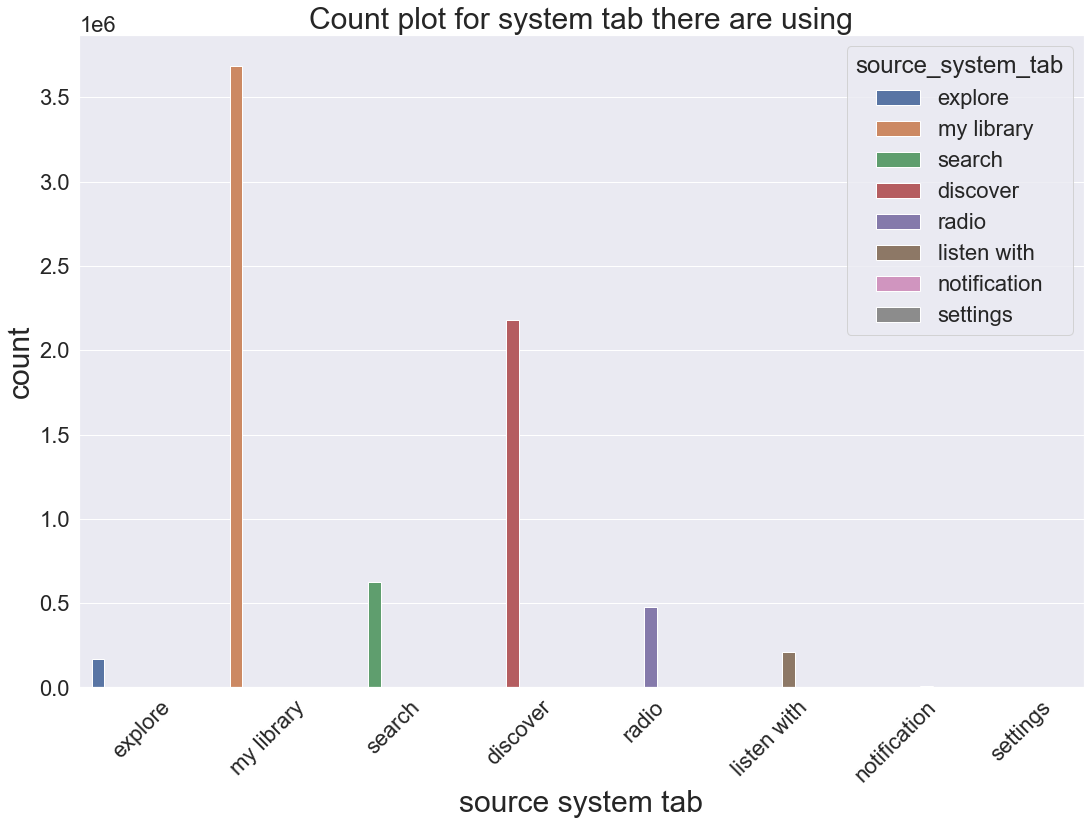

In [34]:
plt.figure(figsize=(18,12))
sns.set(font_scale=2)
sns.countplot(x='source_system_tab',hue='source_system_tab',data=train)
plt.xlabel('source system tab',fontsize=30)
plt.ylabel('count',fontsize=30)
plt.xticks(rotation='45')
plt.title('Count plot for system tab there are using',fontsize=30)

In [35]:
print("Total percentage for NaN value in source_system_tab column  : ",(train["source_system_tab"].isna().sum()/len(train["source_system_tab"]))*100,"%")

Total percentage for NaN value in source_system_tab column  :  0.3368251602389888 %


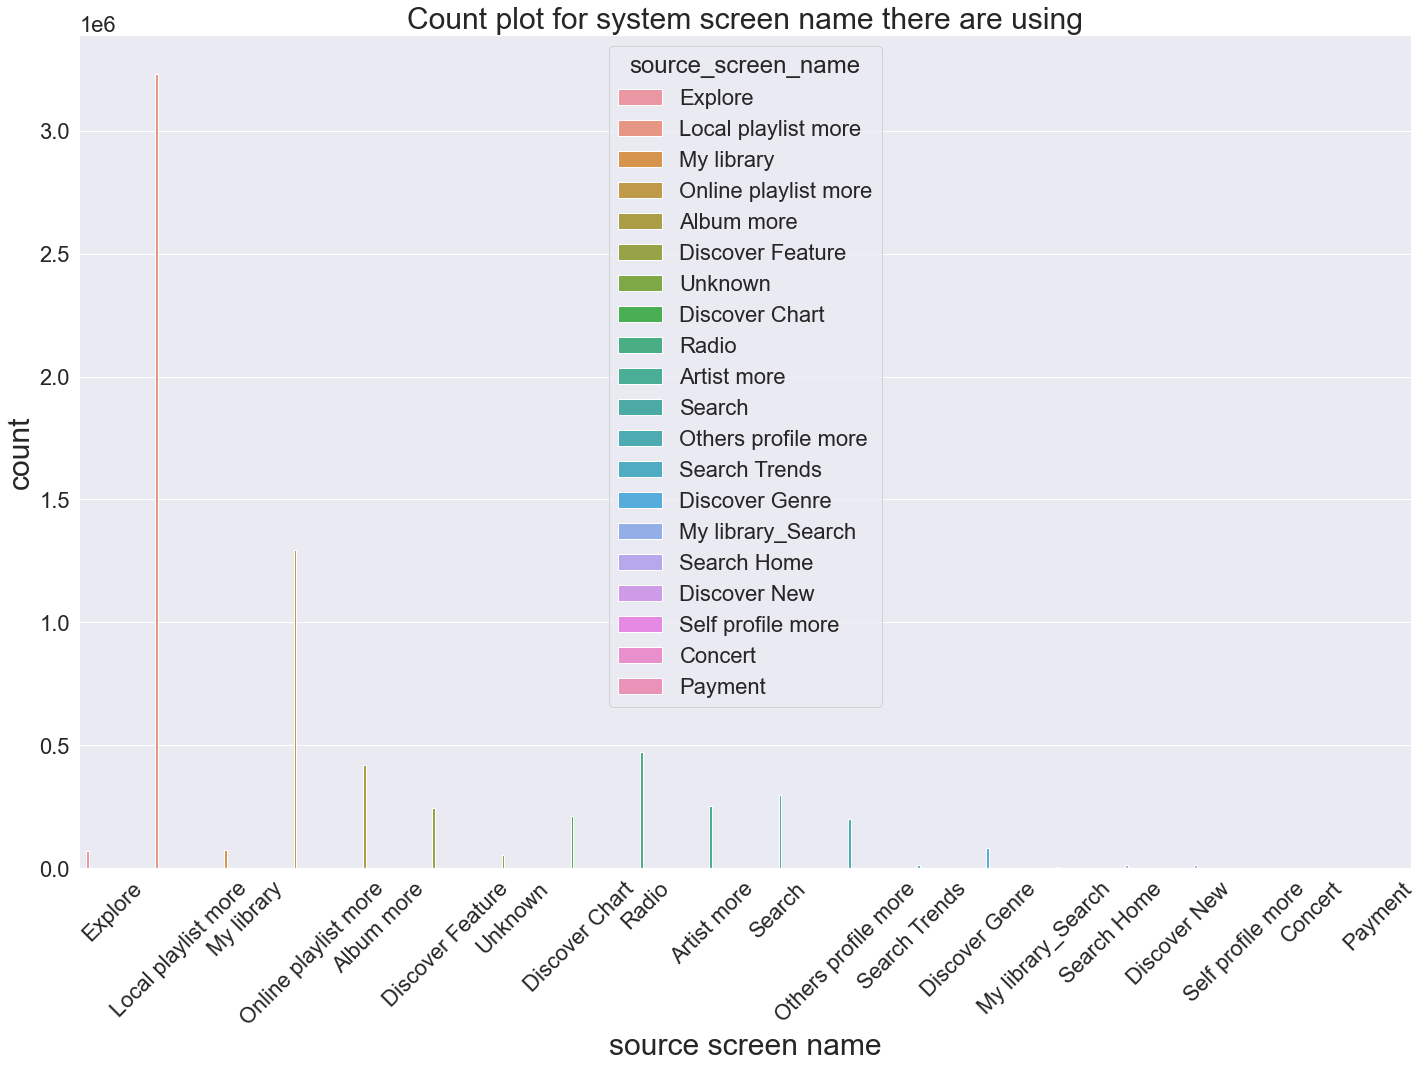

In [36]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.countplot(x='source_screen_name',hue='source_screen_name',data=train)
sns.set(style="darkgrid")
plt.xlabel('source screen name',fontsize=30)
plt.ylabel('count',fontsize=30)
plt.xticks(rotation='45')
plt.title('Count plot for system screen name there are using',fontsize=30)
plt.tight_layout()

In [37]:
print("Total percentage for NaN value in source_screen_name column  : ",(train["source_screen_name"].isna().sum()/len(train["source_screen_name"]))*100,"%")

Total percentage for NaN value in source_screen_name column  :  5.622617560778039 %


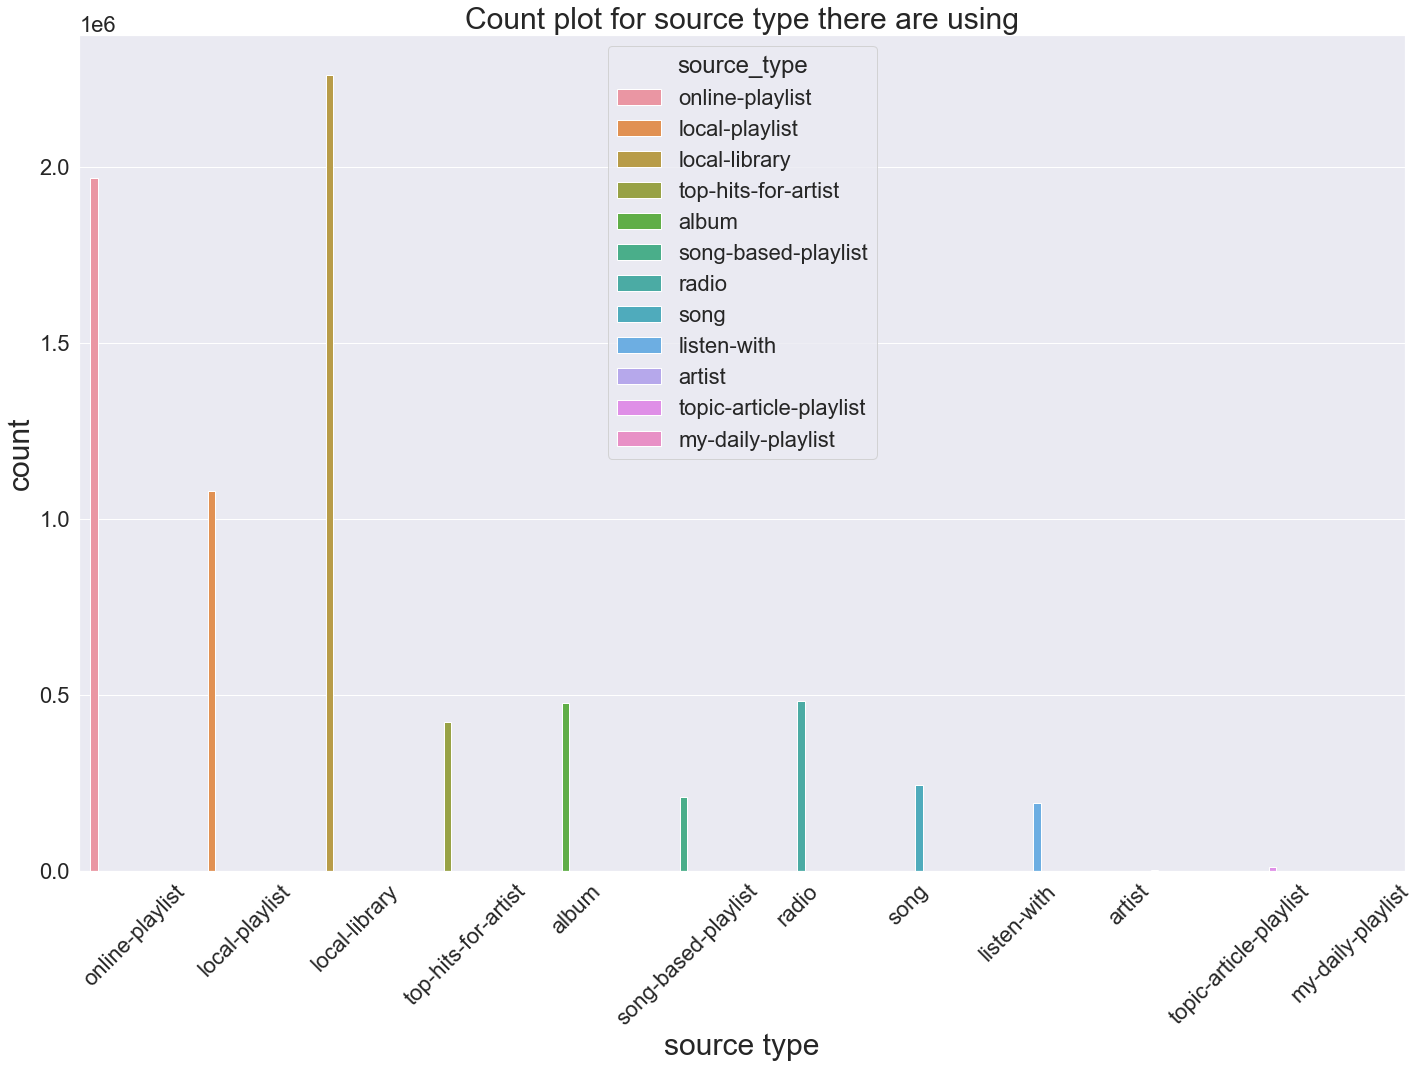

In [38]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.countplot(x='source_type',hue='source_type',data=train)
sns.set(style="darkgrid")
plt.xlabel('source type',fontsize=30)
plt.ylabel('count',fontsize=30)
plt.xticks(rotation='45')
plt.title('Count plot for source type there are using',fontsize=30)
plt.tight_layout()

In [39]:
print("Total percentage for NaN value in source_type column  : ",(train["source_type"].isna().sum()/len(train["source_type"]))*100,"%")

Total percentage for NaN value in source_type column  :  0.2919585144829804 %


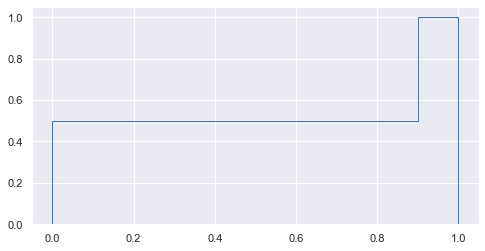

In [40]:
fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
n, bins, patches = ax.hist(train["target"], 10, density=True, histtype='step',cumulative=True, label='Empirical')

In [41]:
print("Total percentage for NaN value in target column  : ",(train["target"].isna().sum()/len(train["target"]))*100,"%")

Total percentage for NaN value in target column  :  0.0 %


In [42]:
duplicate_values = len(train["msno"])-train["msno"].nunique()
print("Total no of duplicate user id         : ",duplicate_values)
print("Total percentage of duplicate user id : ",(duplicate_values/len(train["msno"]))*100,"%")

Total no of duplicate user id         :  7346663
Total percentage of duplicate user id :  99.58311973104954 %


In [43]:
duplicate_values1 = len(train["song_id"])-train["song_id"].nunique()
print("Total no of duplicate song id         : ",duplicate_values1)
print("Total percentage of duplicate song id : ",(duplicate_values1/len(train["song_id"]))*100,"%")

Total no of duplicate song id         :  7017452
Total percentage of duplicate song id :  95.12070483196153 %


 Merging song_info and train.csv

In [44]:
train_and_members = pd.merge(train, members, on='msno', how='left')
final_train       = pd.merge(train_and_members, song_info, on='song_id', how='left')

In [45]:
final_train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,...,expiration_date,name,isrc,song_length,genre_ids,artist_name,composer,lyricist,language,song_duration_minutes
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,0,NaN,7,...,2017-10-05,Good Grief,GBUM71602854,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,3.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,13,24,female,9,...,2017-09-11,Lords of Cardboard,US3C69910183,284584.0,1259,Various Artists,NaN,NaN,52.0,5.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,13,24,female,9,...,2017-09-11,Hip Hop Is Dead(Album Version (Edited)),USUM70618761,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,4.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,13,24,female,9,...,2017-09-11,Disco Africa,GBUQH1000063,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,4.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,1,0,NaN,7,...,2017-10-05,Sleep Without You,QM3E21606003,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,3.0


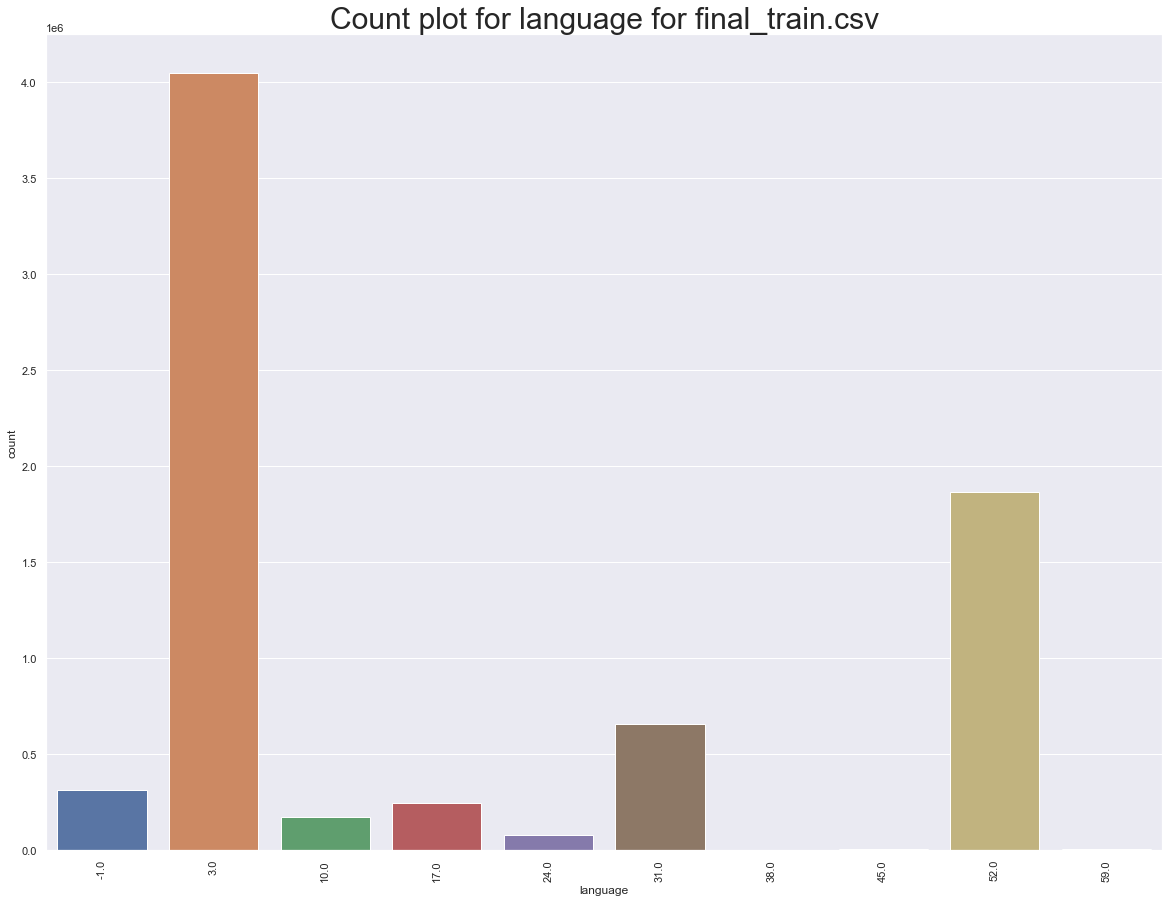

In [46]:
plt.figure(figsize=(20,15)) 
sns.countplot(x ='language', data = final_train) 
plt.xticks(rotation='90')
plt.title('Count plot for language for final_train.csv',fontsize=30)
plt.show()

<AxesSubplot:>

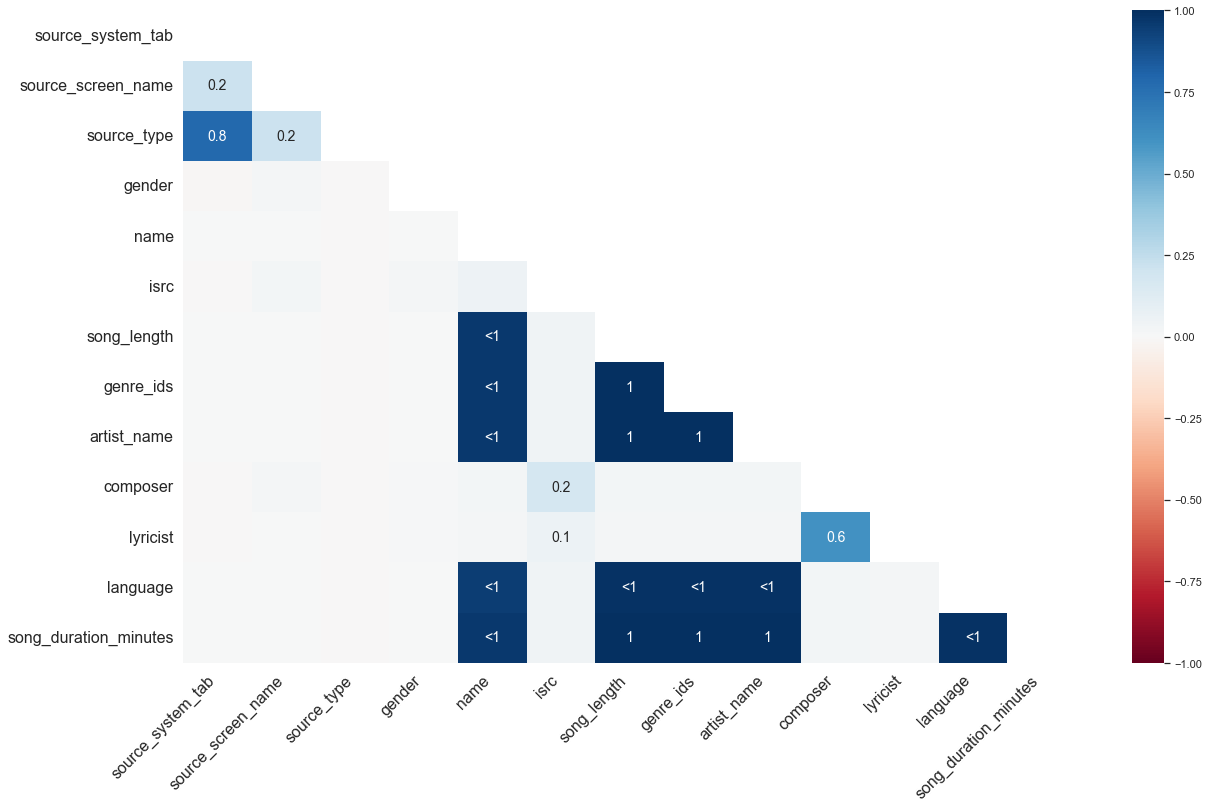

In [47]:
msn.heatmap(final_train)

In [48]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [49]:
print("Total percentage for NaN value in source_system_tab column   : ",(test["source_system_tab"].isna().sum()/len(test["source_system_tab"]))*100,"%")
print("Total percentage for NaN value in source_screen_name column  : ",(test["source_screen_name"].isna().sum()/len(test["source_screen_name"]))*100,"%")
print("Total percentage for NaN value in source_type column         : ",(test["source_type"].isna().sum()/len(test["source_type"]))*100,"%")
print("Total percentage for NaN value in song_id column             : ",(test["song_id"].isna().sum()/len(test["song_id"]))*100,"%")
print("Total percentage for NaN value in msno column                : ",(test["msno"].isna().sum()/len(test["msno"]))*100,"%")

Total percentage for NaN value in source_system_tab column   :  0.3301796393133578 %
Total percentage for NaN value in source_screen_name column  :  6.370605329338741 %
Total percentage for NaN value in source_type column         :  0.28539692348608997 %
Total percentage for NaN value in song_id column             :  0.0 %
Total percentage for NaN value in msno column                :  0.0 %


# Numerical Imputation

In [50]:
from numpy import nan
final_train["gender"].fillna("gender_not_available", inplace=True)

In [51]:
print(final_train["gender"].isnull().sum())

0


In [52]:
final_train["bd"].fillna(members["bd"].mean(), inplace=True)
print(members["bd"].isnull().sum())

0


In [53]:
bd_c=0
for i in final_train["bd"]:
    if i<0 and i>80:
        bd_c+=1
print(bd_c)

0


In [54]:
from numpy import nan
final_train["bd"]=final_train["bd"].mask(final_train["bd"]==0).fillna(final_train["bd"].mean())

In [55]:
final_train["bd"]=final_train["bd"].round()

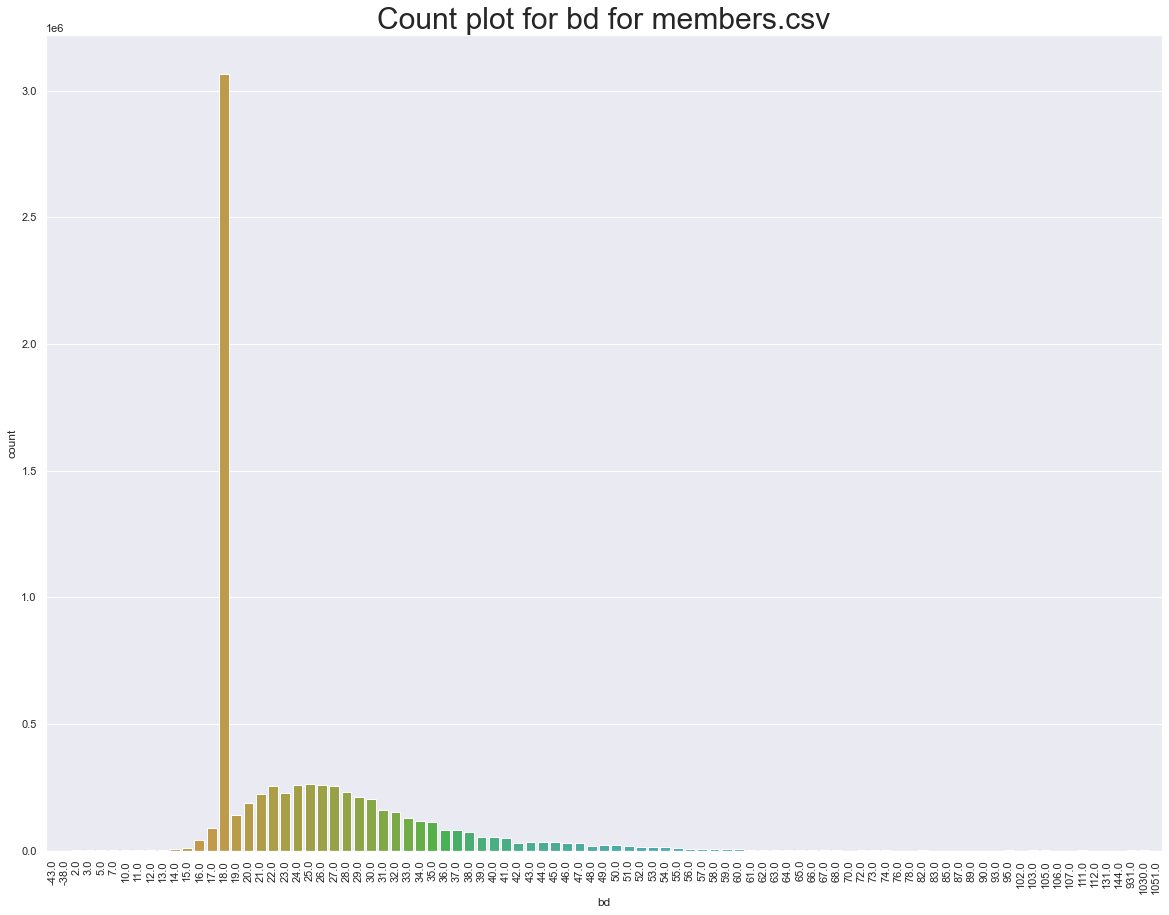

In [56]:
plt.figure(figsize=(20,15))
# count plot on single categorical variable 
sns.countplot(x ='bd', data = final_train) 
plt.xticks(rotation='90')
plt.title('Count plot for bd for members.csv',fontsize=30)
  
# Show the plot 
plt.show()

In [57]:
final_train["genre_ids"]=final_train["genre_ids"].astype(str)

In [58]:
import re 
lst=[]
for i in final_train["genre_ids"]:
  res = re.findall(r"[\w']+",i) #finding values with special charcter " | "
  lst.append(res[0])

In [59]:
final_train["genre_id"]=lst

In [60]:
final_train = final_train.drop(columns="genre_ids") #dropping existing genre_ids column
final_train = final_train.drop(columns="song_length")

In [61]:
final_train["genre_id"]=final_train["genre_id"].replace("nan", '0')

In [62]:
final_train["genre_id"]=pd.to_numeric(final_train["genre_id"])

In [63]:
median_genre_id=int(statistics.median(final_train["genre_id"]))

In [64]:
print(median_genre_id)

465


In [65]:
final_train["genre_id"]=final_train["genre_id"].replace(0,median_genre_id )

In [66]:
final_train["genre_id"].head(50)

0      359
1     1259
2     1259
3     1019
4     1011
5     1259
6      465
7     1011
8     2022
9      465
10     465
11     465
12     465
13     458
14     465
15     465
16     465
17     458
18     465
19     465
20     458
21     465
22     465
23    2022
24    2022
25    2022
26     465
27     465
28     465
29     465
30     465
31     465
32    1259
33     458
34     465
35     465
36    1609
37     423
38     465
39     465
40     465
41     465
42     921
43     465
44     465
45     451
46     458
47     458
48     458
49     458
Name: genre_id, dtype: int64

In [67]:
final_train["language"].isna().sum()

1605

In [68]:
median_lang=round(statistics.median(final_train["language"]))

In [69]:
print(median_lang)

3


In [70]:
final_train["language"].fillna(median_lang, inplace=True)

In [71]:
final_train["language"].isna().sum()

0

In [72]:
final_train["name"].fillna("name_not_available", inplace=True)
final_train["isrc"].fillna("isrc_not_available", inplace=True)
final_train["artist_name"].fillna("artist_not_available", inplace=True)

final_train["source_system_tab"].fillna("data_not_available", inplace=True)
final_train["source_screen_name"].fillna("data_not_available", inplace=True)
final_train["source_type"].fillna("data_not_available", inplace=True)

In [73]:
print("Total percentage for NaN value in name column                    : ",(final_train["name"].isna().sum()/len(final_train["name"]))*100,"%")
print("Total percentage for NaN value in isrc column                    : ",(final_train["isrc"].isna().sum()/len(final_train["isrc"]))*100,"%")
print("Total percentage for NaN value in song_length column             : ",(round((final_train["song_duration_minutes"].isna().sum()/len(final_train["song_duration_minutes"]))*100)),"%")
print("Total percentage for NaN value in artist_name column             : ",(final_train["artist_name"].isna().sum()/len(final_train["artist_name"]))*100,"%")
print("Total percentage for NaN value in source_system_tab column       : ",(final_train["source_system_tab"].isna().sum()/len(final_train["source_system_tab"]))*100,"%")
print("Total percentage for NaN value in source_screen_name column      : ",(final_train["source_screen_name"].isna().sum()/len(final_train["source_screen_name"]))*100,"%")
print("Total percentage for NaN value in source_type column             : ",(final_train["source_type"].isna().sum()/len(final_train["source_type"]))*100,"%")

Total percentage for NaN value in name column                    :  0.0 %
Total percentage for NaN value in isrc column                    :  0.0 %
Total percentage for NaN value in song_length column             :  0 %
Total percentage for NaN value in artist_name column             :  0.0 %
Total percentage for NaN value in source_system_tab column       :  0.0 %
Total percentage for NaN value in source_screen_name column      :  0.0 %
Total percentage for NaN value in source_type column             :  0.0 %


In [74]:
final_train.head(2)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,name,isrc,artist_name,composer,lyricist,language,song_duration_minutes,genre_id
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,18.0,gender_not_available,7,2012-01-02,2017-10-05,Good Grief,GBUM71602854,Bastille,Dan Smith| Mark Crew,NaN,52.0,3.0,359
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,13,24.0,female,9,2011-05-25,2017-09-11,Lords of Cardboard,US3C69910183,Various Artists,NaN,NaN,52.0,5.0,1259


In [75]:
final_train = final_train.drop(["composer","lyricist"],axis=1)

# Test.csv

In [76]:
test_members = pd.merge(test, members, on='msno', how='left')
final_test   = pd.merge(test_members, song_info, on='song_id', how='left')

In [77]:
final_test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type,city,bd,gender,registered_via,...,expiration_date,name,isrc,song_length,genre_ids,artist_name,composer,lyricist,language,song_duration_minutes
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library,1,0,NaN,7,...,2017-09-18,愛其實很殘忍,TWUM71400047,224130.0,458,梁文音 (Rachel Liang),Qi Zheng Zhang,NaN,3.0,4.0
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library,1,0,NaN,7,...,2017-09-18,她說,TWB671005201,320470.0,465,林俊傑 (JJ Lin),林俊傑,孫燕姿/易家揚,3.0,5.0
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist,1,0,NaN,4,...,2016-11-24,subarashiki nichijo,JPWP01070260,315899.0,2022,Yu Takahashi (高橋優),Yu Takahashi,Yu Takahashi,17.0,5.0
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio,3,30,male,9,...,2017-04-30,Hold Me| Thrill Me| Kiss Me| Kill Me,GBAAN0201228,285210.0,465,U2,The Edge| Adam Clayton| Larry Mullen| Jr.,NaN,52.0,5.0
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio,3,30,male,9,...,2017-04-30,Om Yoga,ITO101121898,197590.0,873,Yoga Mr Sound,Neuromancer,NaN,-1.0,3.0


In [78]:
print(final_test.isnull().sum())

id                              0
msno                            0
song_id                         0
source_system_tab            8442
source_screen_name         162883
source_type                  7297
city                            0
bd                              0
gender                    1052224
registered_via                  0
registration_init_time          0
expiration_date                 0
name                          778
isrc                       196643
song_length                   796
genre_ids                     796
artist_name                   796
composer                   619756
lyricist                  1225042
language                      813
song_duration_minutes         796
dtype: int64


In [79]:
test['source_system_tab'].fillna('no_system_tab', inplace=True)
test['source_screen_name'].fillna('no_screen_name', inplace=True)
test['source_type'].fillna('no_source_type', inplace=True)

In [80]:
print(test.isnull().sum())

id                    0
msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
dtype: int64


In [81]:
import datetime
members["expiration_date"]= pd.to_datetime(members["expiration_date"],format='%Y%m%d') 
members["registration_init_time"]= pd.to_datetime(members["registration_init_time"],format='%Y%m%d') 
members.dtypes

msno                              object
city                               int64
bd                                 int64
gender                            object
registered_via                     int64
registration_init_time    datetime64[ns]
expiration_date           datetime64[ns]
dtype: object

In [82]:
members['registration_init_time'].head(-50)

0       2011-08-20
1       2015-06-28
2       2016-04-11
3       2015-09-06
4       2017-01-26
           ...    
34348   2011-01-25
34349   2016-06-14
34350   2017-02-13
34351   2016-08-10
34352   2015-10-01
Name: registration_init_time, Length: 34353, dtype: datetime64[ns]

# Getting day of the week

In [83]:
final_train['month'] = final_train['registration_init_time'].dt.month
final_train[['registration_init_time','month']].head()

,registration_init_time,month
0,2012-01-02,1
1,2011-05-25,5
2,2011-05-25,5
3,2011-05-25,5
4,2012-01-02,1


In [84]:
final_train['day'] =final_train['registration_init_time'].dt.day
final_train[['registration_init_time','day']].head()

,registration_init_time,day
0,2012-01-02,2
1,2011-05-25,25
2,2011-05-25,25
3,2011-05-25,25
4,2012-01-02,2


In [85]:
final_train['year'] =final_train['registration_init_time'].dt.year
final_train[['registration_init_time','year']].head()

,registration_init_time,year
0,2012-01-02,2012
1,2011-05-25,2011
2,2011-05-25,2011
3,2011-05-25,2011
4,2012-01-02,2012


In [86]:
final_train['year'] =final_train['registration_init_time'].dt.dayofweek
final_train[['registration_init_time','year']].head()

,registration_init_time,year
0,2012-01-02,0
1,2011-05-25,2
2,2011-05-25,2
3,2011-05-25,2
4,2012-01-02,0


In [87]:
final_train['ex_month'] = final_train['expiration_date'].dt.month
final_train[['expiration_date','ex_month']].head()

,expiration_date,ex_month
0,2017-10-05,10
1,2017-09-11,9
2,2017-09-11,9
3,2017-09-11,9
4,2017-10-05,10


In [88]:
final_train['ex_day'] = final_train['expiration_date'].dt.day
final_train[['expiration_date','ex_day']].head()

,expiration_date,ex_day
0,2017-10-05,5
1,2017-09-11,11
2,2017-09-11,11
3,2017-09-11,11
4,2017-10-05,5


In [89]:
final_train['ex_year'] = final_train['expiration_date'].dt.year
final_train[['expiration_date','ex_year']].head()

,expiration_date,ex_year
0,2017-10-05,2017
1,2017-09-11,2017
2,2017-09-11,2017
3,2017-09-11,2017
4,2017-10-05,2017


In [90]:
final_train['ex_dayofweek'] = final_train['expiration_date'].dt.dayofweek
final_train[['expiration_date','ex_dayofweek']].head()

,expiration_date,ex_dayofweek
0,2017-10-05,3
1,2017-09-11,0
2,2017-09-11,0
3,2017-09-11,0
4,2017-10-05,3


In [91]:
final_train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,...,language,song_duration_minutes,genre_id,month,day,year,ex_month,ex_day,ex_year,ex_dayofweek
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,18.0,gender_not_available,7,...,52.0,3.0,359,1,2,0,10,5,2017,3
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,13,24.0,female,9,...,52.0,5.0,1259,5,25,2,9,11,2017,0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,13,24.0,female,9,...,52.0,4.0,1259,5,25,2,9,11,2017,0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,13,24.0,female,9,...,-1.0,4.0,1019,5,25,2,9,11,2017,0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,1,18.0,gender_not_available,7,...,52.0,3.0,1011,1,2,0,10,5,2017,3


In [92]:
from collections import Counter   
d = Counter(final_train["name"]) 
df = pd.DataFrame.from_records(d.most_common(), columns=['song_name','count'])
print(df.head(-10))

                                  song_name  count
0                                        演員  19260
1                                    Closer  15149
2                                     Faded  15083
3                                      帥到分手  13973
4                                      告白氣球  13882
...                                     ...    ...
234130                        Retro Romance      1
234131  走過那一年 (The year we've been through)      1
234132           The mellow colour of heart      1
234133                   Too much blossomed      1
234134            那。三個字 (Those three words)      1

[234135 rows x 2 columns]


In [93]:
final_train["artist_name"].head()

0           Bastille
1    Various Artists
2                Nas
3           Soundway
4        Brett Young
Name: artist_name, dtype: object

In [94]:
from collections import Counter  
d = Counter(final_train["artist_name"]) 
df1 = pd.DataFrame.from_records(d.most_common(), columns=['artist_name','count'])
print(df1.head(10))

        artist_name   count
0   Various Artists  303506
1    周杰倫 (Jay Chou)  186776
2      五月天 (Mayday)  182088
3      林俊傑 (JJ Lin)  115325
4        田馥甄 (Hebe)  104946
5        aMEI (張惠妹)   82799
6  陳奕迅 (Eason Chan)   76035
7               玖壹壹   70445
8         G.E.M.鄧紫棋   67296
9           BIGBANG   61927


In [95]:
from collections import Counter   
d = Counter(final_train["song_duration_minutes"]) 
df2 = pd.DataFrame.from_records(d.most_common(), columns=['song_duration_minutes','count'])
print(df2.head(10))

   song_duration_minutes    count
0                    4.0  3857769
1                    5.0  1693296
2                    3.0  1392289
3                    6.0   170616
4                    2.0   133133
5                    1.0    44510
6                    7.0    40277
7                    8.0    14273
8                    9.0    10299
9                    0.0     3874


In [96]:
median_song=round(statistics.median(final_train["song_duration_minutes"])) #finding median value 
median_song

6

In [97]:
from numpy import nan
final_train["song_duration_minutes"]=final_train["song_duration_minutes"].mask(final_train["song_duration_minutes"]==0.0).fillna(median_song)

In [98]:
final_train["song_duration_minutes"]=final_train["song_duration_minutes"].astype(int)

In [99]:
from collections import Counter 
d = Counter(final_train["song_duration_minutes"]) 
df3 = pd.DataFrame.from_records(d.most_common(), columns=['song_duration_minutes','count'])
print(df3.head(10))

   song_duration_minutes    count
0                      4  3857769
1                      5  1693296
2                      3  1392289
3                      6   176059
4                      2   133133
5                      1    44510
6                      7    40277
7                      8    14273
8                      9    10299
9                     10     3319


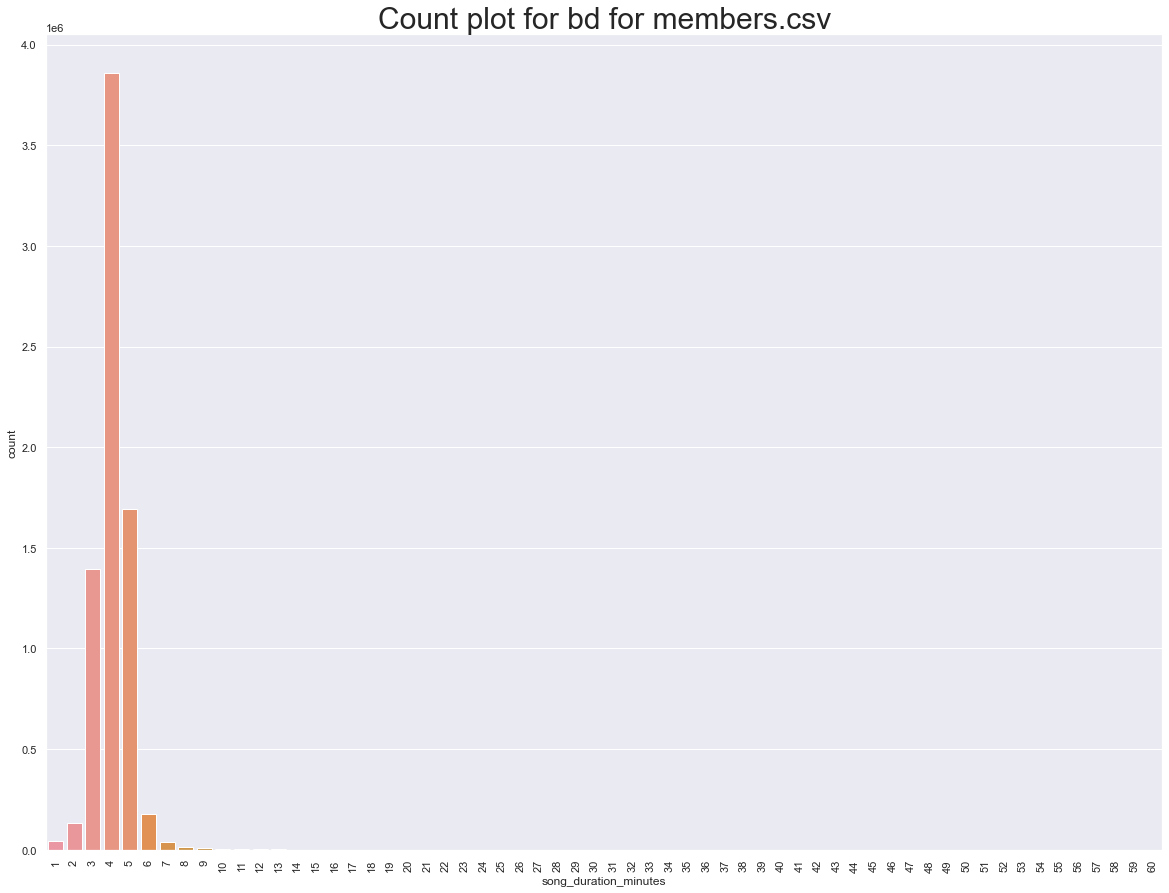

In [100]:
plt.figure(figsize=(20,15))
# count plot on single categorical variable 
sns.countplot(x ='song_duration_minutes', data = final_train) 
plt.xticks(rotation='90')
plt.title('Count plot for bd for members.csv',fontsize=30)
  
# Show the plot 
plt.show()

# The End